# NYSED School Report Card Project

### Variable descriptions (from the original data curated by NYSED):

- ```INSTITUTION_ID```: 12-digit unique school identifier which remains consistent over time.

- ```ENTITY_CD```: Also a 12-digit school identifier, but the code will update with changes in location, district, or any other subgroup assignments. Using the ```ENTITY_CD``` variable, along with the documentation, we can filter schools by location (county/city/town), school district, and type of school.

- ```ENTITY_NAME```: The name of the school.

- ```WEIGHTED_INDEX```: Weighted Average Performance Index for the Subgroup by Subject.

- ```ENROLLMENT```: Number of students in grades 9-12 (and ungraded age equivalent) enrolled for 10 or more instructional days and present for at least one of those days.

- ```ABSENT_COUNT```: Number of students in grades 9-12 (and ungraded age equivalent) enrolled for 10 or more instructional days, present for at least one of those days, and absent for 10% or more of enrolled days.

- ```GRAD_COUNT```: Number of students in the ```COHORT_COUNT``` who graduated as of August 31st of the year prior to the reporting year. Not reported for “Combined” cohort.

- ```COHORT_COUNT```: Number of students in the cohort as of June 30th of the year prior to the reporting year. Not reported for “Combined” cohort.

- ```ELA_P_RATE```: Percent of students in grade 12 in the current year with a valid score on an approved ELA assessment.

- ```MATH_P_RATE```: Percent of students in grade 12 in the current year with a valid score on an approved Math assessment.

- ```PUPIL_COUNT_TOT```: Pupil counts for districts, schools, and statewide.

- ```FED_STATE_LOCAL_EXP```: Total federal and state/local expenditures.

- ```NUM_TEACH```: Number of teachers as reported in the Student Information Repository System (SIRS).

- ```NUM_TEACH_INEXP```: Number of teachers with fewer than four years of experience in their positions.

- ```NUM_TEACH_OC```: Number of teachers as reported in the Student Information Repository System (SIRS).

- ```NUM_OUT_CERT```: Number of teachers teaching out of their subject/field of certification.

More information about the ```ENTITY_CD``` variable can be found in the PDF README file attached to this repo.

### Variables created in Python:

I also created new variables, which are variables in the original README file but are re-created in Python to avoid any rounding problems while migrating data from SQL to Python.

- ```ABSENT_RATE```: Chronic absenteeism rate for current reporting year (```= ABSENT_COUNT / ENROLLMENT * 100```)

- ```GRAD_RATE```: Graduation rate of the 4-year graduation rate total cohort (```= GRAD_COUNT / COHORT_COUNT * 100```)

- ```PER_FED_STATE_LOCAL_EXP```: Per pupil expenditures using federal and state/local funds (```= FED_STATE_LOCAL_EXP / PUPIL_COUNT_TOT```)

- ```PER_TEACH_INEXP```: Percent of teachers with fewer than four years of experience in their positions (```= NUM_TEACH_INEXP / NUM_TEACH * 100```)

- ```PER_OUT_CERT```: Percent of teachers teaching out of their subject/field of certification (```= NUM_OUT_CERT / NUM_TEACH_OC * 100```)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nysed_2024 = pd.read_csv('data/nysed_2024_preprocessing.csv')
nysed_2024.head()

,INSTITUTION_ID,ENTITY_CD,ENTITY_NAME,WEIGHTED_INDEX,ENROLLMENT,ABSENT_COUNT,GRAD_COUNT,COHORT_COUNT,ELA_P_RATE,MATH_P_RATE,PUPIL_COUNT_TOT,FED_STATE_LOCAL_EXP,NUM_TEACH,NUM_TEACH_INEXP,NUM_TEACH_OC,NUM_OUT_CERT
0,800000055743,10100010034,ALBANY HIGH SCHOOL,82.2,3046,1550,549,704,98.9,84.3,2764,94032063,235,63,214,14
1,800000055479,10201040001,BERNE-KNOX-WESTERLO JUNIOR-SENIOR HS,142.3,222,42,47,53,100.0,86.7,326,11481752,41,11,41,1
2,800000055439,10306060008,BETHLEHEM CENTRAL SENIOR HIGH SCHOOL,198.1,1374,155,333,349,99.4,92.1,1373,32156676,110,9,107,1
3,800000055436,10402060001,RAVENA-COEYMANS-SELKIRK SR HS,129.2,530,164,118,133,100.0,87.9,518,13997053,59,24,55,3
4,800000055426,10500010007,COHOES HIGH SCHOOL,94.0,619,326,109,132,100.0,81.0,593,14868772,52,8,51,0


Data preprocessing

In [3]:
nysed_2024['ABSENT_RATE'] = nysed_2024['ABSENT_COUNT'] / nysed_2024['ENROLLMENT']
nysed_2024['GRAD_RATE'] = nysed_2024['GRAD_COUNT'] / nysed_2024['COHORT_COUNT']
nysed_2024['PER_FED_STATE_LOCAL_EXP'] = nysed_2024['FED_STATE_LOCAL_EXP'] / nysed_2024['PUPIL_COUNT_TOT']
nysed_2024['PER_TEACH_INEXP'] = nysed_2024['NUM_TEACH_INEXP'] / nysed_2024['NUM_TEACH']
nysed_2024['PER_OUT_CERT'] = nysed_2024['NUM_OUT_CERT'] / nysed_2024['NUM_TEACH_OC']

In [4]:
nysed_2024.head()

,INSTITUTION_ID,ENTITY_CD,ENTITY_NAME,WEIGHTED_INDEX,ENROLLMENT,ABSENT_COUNT,GRAD_COUNT,COHORT_COUNT,ELA_P_RATE,MATH_P_RATE,...,FED_STATE_LOCAL_EXP,NUM_TEACH,NUM_TEACH_INEXP,NUM_TEACH_OC,NUM_OUT_CERT,ABSENT_RATE,GRAD_RATE,PER_FED_STATE_LOCAL_EXP,PER_TEACH_INEXP,PER_OUT_CERT
0,800000055743,10100010034,ALBANY HIGH SCHOOL,82.2,3046,1550,549,704,98.9,84.3,...,94032063,235,63,214,14,0.508864,0.779830,34020.283285,0.268085,0.065421
1,800000055479,10201040001,BERNE-KNOX-WESTERLO JUNIOR-SENIOR HS,142.3,222,42,47,53,100.0,86.7,...,11481752,41,11,41,1,0.189189,0.886792,35220.098160,0.268293,0.024390
2,800000055439,10306060008,BETHLEHEM CENTRAL SENIOR HIGH SCHOOL,198.1,1374,155,333,349,99.4,92.1,...,32156676,110,9,107,1,0.112809,0.954155,23420.739985,0.081818,0.009346
3,800000055436,10402060001,RAVENA-COEYMANS-SELKIRK SR HS,129.2,530,164,118,133,100.0,87.9,...,13997053,59,24,55,3,0.309434,0.887218,27021.337838,0.406780,0.054545
4,800000055426,10500010007,COHOES HIGH SCHOOL,94.0,619,326,109,132,100.0,81.0,...,14868772,52,8,51,0,0.526656,0.825758,25073.814503,0.153846,0.000000


In [5]:
nysed_2024.shape

(990, 21)

In [6]:
nysed_2024.describe()

,INSTITUTION_ID,ENTITY_CD,WEIGHTED_INDEX,ENROLLMENT,ABSENT_COUNT,GRAD_COUNT,COHORT_COUNT,ELA_P_RATE,MATH_P_RATE,PUPIL_COUNT_TOT,FED_STATE_LOCAL_EXP,NUM_TEACH,NUM_TEACH_INEXP,NUM_TEACH_OC,NUM_OUT_CERT,ABSENT_RATE,GRAD_RATE,PER_FED_STATE_LOCAL_EXP,PER_TEACH_INEXP,PER_OUT_CERT
count,9.900000e+02,9.900000e+02,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,949.000000,990.000000,9.900000e+02,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000,990.000000
mean,8.000001e+11,3.490071e+11,117.198586,755.427273,233.007071,163.050505,182.601010,95.714343,84.129821,796.629293,2.282600e+07,70.062626,12.980808,67.656566,6.235354,0.351075,0.882767,29896.664771,0.202937,0.116564
std,1.222746e+04,1.563176e+11,48.521109,673.587789,230.874468,152.568874,167.142575,11.664413,16.813701,646.010156,1.745835e+07,45.829178,10.892834,44.336123,10.043795,0.205835,0.136408,6408.318318,0.126757,0.159363
min,8.000000e+11,1.010001e+10,1.600000,140.000000,0.000000,7.000000,50.000000,1.000000,6.400000,93.000000,2.250587e+06,13.000000,0.000000,11.000000,0.000000,0.000000,0.140000,11519.781971,0.000000,0.000000
25%,8.000000e+11,2.804023e+11,77.100000,363.000000,105.000000,73.000000,84.000000,96.900000,77.400000,389.000000,1.171352e+07,38.000000,6.000000,37.000000,1.000000,0.205318,0.852273,25820.996796,0.106383,0.016810
50%,8.000001e+11,3.313000e+11,119.400000,485.000000,171.000000,103.000000,114.000000,99.100000,89.900000,564.500000,1.609681e+07,54.000000,10.000000,52.000000,4.000000,0.307280,0.917808,29200.819512,0.176471,0.069570
75%,8.000001e+11,4.218000e+11,153.200000,944.750000,257.500000,210.750000,228.750000,100.000000,95.900000,1023.000000,2.919355e+07,90.000000,17.000000,86.750000,7.000000,0.453353,0.958904,33163.077350,0.275805,0.147059
max,8.000001e+11,6.806011e+11,241.500000,5794.000000,1617.000000,1456.000000,1498.000000,100.000000,100.000000,5810.000000,1.341109e+08,344.000000,79.000000,331.000000,93.000000,1.000000,1.000000,80138.655488,0.782178,0.898734


In [7]:
nysed_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 990 entries, 0 to 989
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   INSTITUTION_ID           990 non-null    int64  
 1   ENTITY_CD                990 non-null    int64  
 2   ENTITY_NAME              990 non-null    object 
 3   WEIGHTED_INDEX           990 non-null    float64
 4   ENROLLMENT               990 non-null    int64  
 5   ABSENT_COUNT             990 non-null    int64  
 6   GRAD_COUNT               990 non-null    int64  
 7   COHORT_COUNT             990 non-null    int64  
 8   ELA_P_RATE               990 non-null    float64
 9   MATH_P_RATE              949 non-null    float64
 10  PUPIL_COUNT_TOT          990 non-null    int64  
 11  FED_STATE_LOCAL_EXP      990 non-null    int64  
 12  NUM_TEACH                990 non-null    int64  
 13  NUM_TEACH_INEXP          990 non-null    int64  
 14  NUM_TEACH_OC             9

In [8]:
nysed_2024.nunique()

INSTITUTION_ID             987
ENTITY_CD                  987
ENTITY_NAME                985
WEIGHTED_INDEX             772
ENROLLMENT                 651
ABSENT_COUNT               413
GRAD_COUNT                 351
COHORT_COUNT               341
ELA_P_RATE                 172
MATH_P_RATE                381
PUPIL_COUNT_TOT            687
FED_STATE_LOCAL_EXP        987
NUM_TEACH                  172
NUM_TEACH_INEXP             62
NUM_TEACH_OC               173
NUM_OUT_CERT                54
ABSENT_RATE                970
GRAD_RATE                  758
PER_FED_STATE_LOCAL_EXP    987
PER_TEACH_INEXP            603
PER_OUT_CERT               445
dtype: int64

In [9]:
nysed_2024.isna().sum()

INSTITUTION_ID              0
ENTITY_CD                   0
ENTITY_NAME                 0
WEIGHTED_INDEX              0
ENROLLMENT                  0
ABSENT_COUNT                0
GRAD_COUNT                  0
COHORT_COUNT                0
ELA_P_RATE                  0
MATH_P_RATE                41
PUPIL_COUNT_TOT             0
FED_STATE_LOCAL_EXP         0
NUM_TEACH                   0
NUM_TEACH_INEXP             0
NUM_TEACH_OC                0
NUM_OUT_CERT                0
ABSENT_RATE                 0
GRAD_RATE                   0
PER_FED_STATE_LOCAL_EXP     0
PER_TEACH_INEXP             0
PER_OUT_CERT                0
dtype: int64

EDA

In [10]:
# True numerical columns
numerical_cols = [x for x in nysed_2024.columns.tolist() if x not in ['INSTITUTION_ID', 'ENTITY_CD', 'ENTITY_NAME']]
print(numerical_cols)
print(len(numerical_cols))

['WEIGHTED_INDEX', 'ENROLLMENT', 'ABSENT_COUNT', 'GRAD_COUNT', 'COHORT_COUNT', 'ELA_P_RATE', 'MATH_P_RATE', 'PUPIL_COUNT_TOT', 'FED_STATE_LOCAL_EXP', 'NUM_TEACH', 'NUM_TEACH_INEXP', 'NUM_TEACH_OC', 'NUM_OUT_CERT', 'ABSENT_RATE', 'GRAD_RATE', 'PER_FED_STATE_LOCAL_EXP', 'PER_TEACH_INEXP', 'PER_OUT_CERT']
18


Text(0.5, 1.02, 'Distribution of each numerical column in the NYSED 2024 dataset (histograms)')

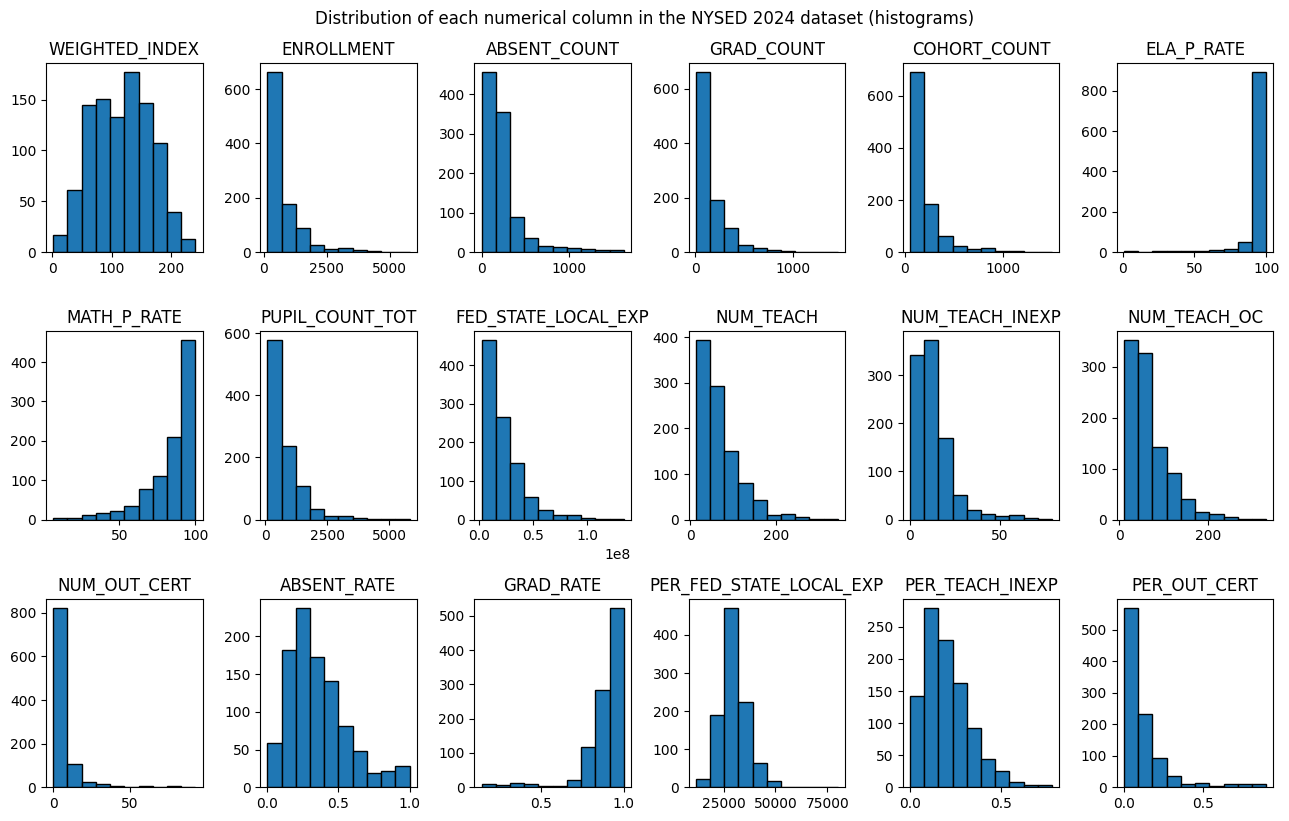

In [11]:
fig, ax = plt.subplots(nrows = 3, ncols = 6, figsize = (13, 8))

# The counter method: https://www.kaggle.com/code/aleksandradeis/bank-marketing-analysis/notebook
counter = 0
for var in numerical_cols:
    ax[counter // 6][counter % 6].hist(nysed_2024[var], edgecolor = 'black')
    ax[counter // 6][counter % 6].set_title(var)
    counter += 1

fig.tight_layout() # make sure that the graph titles and axes don't overlap with each other
fig.suptitle('Distribution of each numerical column in the NYSED 2024 dataset (histograms)', y = 1.02)

In [24]:
nysed_2024[nysed_2024['MATH_P_RATE'].notna()]

,INSTITUTION_ID,ENTITY_CD,ENTITY_NAME,WEIGHTED_INDEX,ENROLLMENT,ABSENT_COUNT,GRAD_COUNT,COHORT_COUNT,ELA_P_RATE,MATH_P_RATE,...,FED_STATE_LOCAL_EXP,NUM_TEACH,NUM_TEACH_INEXP,NUM_TEACH_OC,NUM_OUT_CERT,ABSENT_RATE,GRAD_RATE,PER_FED_STATE_LOCAL_EXP,PER_TEACH_INEXP,PER_OUT_CERT
0,800000055743,10100010034,ALBANY HIGH SCHOOL,82.2,3046,1550,549,704,98.9,84.3,...,94032063,235,63,214,14,0.508864,0.779830,34020.283285,0.268085,0.065421
1,800000055479,10201040001,BERNE-KNOX-WESTERLO JUNIOR-SENIOR HS,142.3,222,42,47,53,100.0,86.7,...,11481752,41,11,41,1,0.189189,0.886792,35220.098160,0.268293,0.024390
2,800000055439,10306060008,BETHLEHEM CENTRAL SENIOR HIGH SCHOOL,198.1,1374,155,333,349,99.4,92.1,...,32156676,110,9,107,1,0.112809,0.954155,23420.739985,0.081818,0.009346
3,800000055436,10402060001,RAVENA-COEYMANS-SELKIRK SR HS,129.2,530,164,118,133,100.0,87.9,...,13997053,59,24,55,3,0.309434,0.887218,27021.337838,0.406780,0.054545
4,800000055426,10500010007,COHOES HIGH SCHOOL,94.0,619,326,109,132,100.0,81.0,...,14868772,52,8,51,0,0.526656,0.825758,25073.814503,0.153846,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,800000050792,670201060001,ATTICA SENIOR HIGH SCHOOL,163.5,356,97,102,106,100.0,74.5,...,10279284,41,2,39,1,0.272472,0.962264,29202.511364,0.048780,0.025641
986,800000050828,670401040001,LETCHWORTH SENIOR HIGH SCHOOL,155.7,263,32,60,63,98.5,95.5,...,7530930,42,6,41,0,0.121673,0.952381,28526.250000,0.142857,0.000000
987,800000050807,671201060002,PERRY JUNIOR-SENIOR HIGH SCHOOL,174.8,227,48,54,59,100.0,96.3,...,6565281,50,10,47,3,0.211454,0.915254,19253.023460,0.200000,0.063830
988,800000050811,671501040002,WARSAW SENIOR HIGH SCHOOL,177.1,232,52,47,56,100.0,96.4,...,6387078,39,4,38,2,0.224138,0.839286,28387.013333,0.102564,0.052632


Text(0.5, 1.02, 'Distribution of each numerical column in the NYSED 2024 dataset (box plots)')

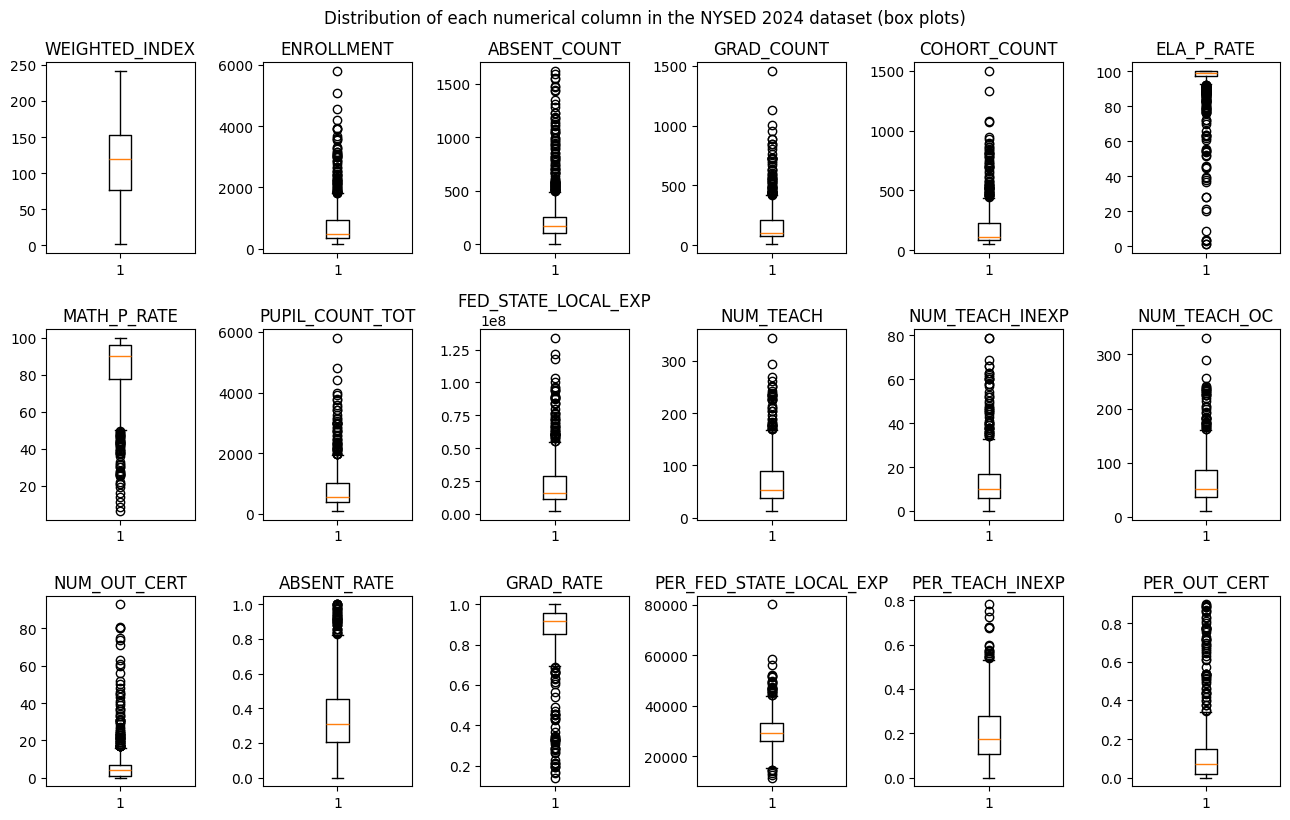

In [28]:
fig, ax = plt.subplots(nrows = 3, ncols = 6, figsize = (13, 8))

# The counter method: https://www.kaggle.com/code/aleksandradeis/bank-marketing-analysis/notebook
counter = 0
for var in numerical_cols:
    ax[counter // 6][counter % 6].boxplot(nysed_2024[nysed_2024[var].notna()][var]) # avoid missing values
    ax[counter // 6][counter % 6].set_title(var)
    counter += 1

fig.tight_layout() # make sure that the graph titles and axes don't overlap with each other
fig.suptitle('Distribution of each numerical column in the NYSED 2024 dataset (box plots)', y = 1.02)

Text(0.5, 1.0, 'Correlation between numerical variables of the NYSED 2024 dataset')

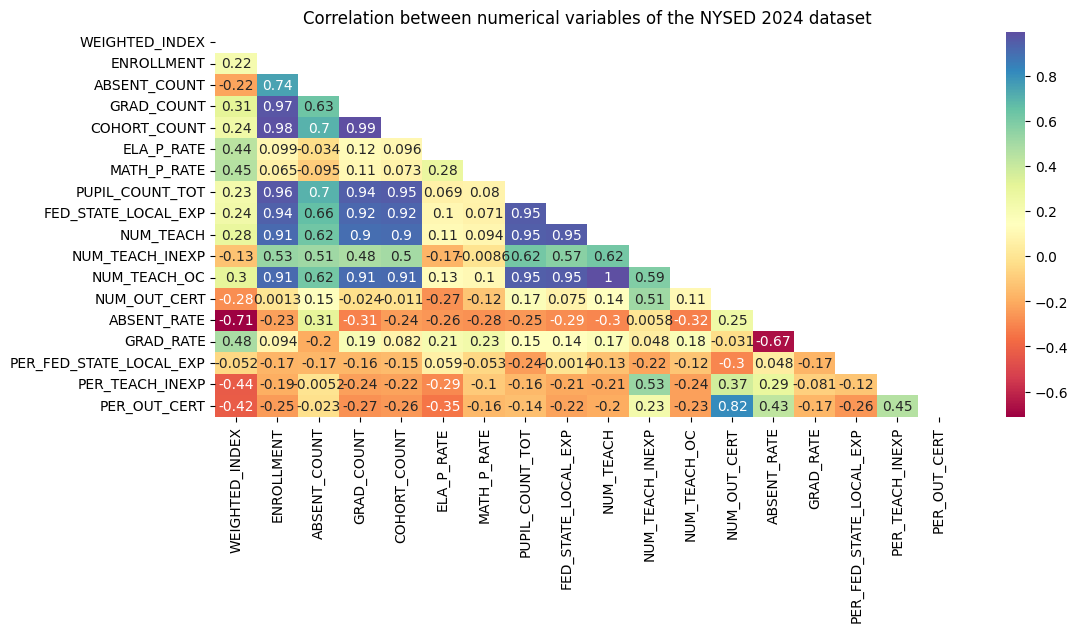

In [12]:
# Check the correlation between selected numerical columns
nysed_2024_corr = nysed_2024[numerical_cols].corr()
plt.figure(figsize = (12, 5))
sns.heatmap(data = nysed_2024_corr, mask = np.triu(nysed_2024_corr), cmap = 'Spectral', annot = True)
# Used np.triu to show only the lower triangle of the correlation graph
plt.title('Correlation between numerical variables of the NYSED 2024 dataset')

From the correlation heatmap and the knowledge of the dataset, I can eliminate a few features:

- ```NUM_TEACH``` and ```NUM_TEACH_OC``` is actually the same number. I will eliminate ```NUM_TEACH_OC```.

- ```ENROLLMENT```, ```COHORT_COUNT``` and ```PUPIL_COUNT_TOT``` all refers to the number of students. They are all very strongly correlated, so I will keep ```ENROLLMENT``` and remove the other two variables.

In [13]:
nysed_2024.drop(['NUM_TEACH_OC', 'COHORT_COUNT', 'PUPIL_COUNT_TOT'], axis = 1)
nysed_2024.head()

,INSTITUTION_ID,ENTITY_CD,ENTITY_NAME,WEIGHTED_INDEX,ENROLLMENT,ABSENT_COUNT,GRAD_COUNT,COHORT_COUNT,ELA_P_RATE,MATH_P_RATE,...,FED_STATE_LOCAL_EXP,NUM_TEACH,NUM_TEACH_INEXP,NUM_TEACH_OC,NUM_OUT_CERT,ABSENT_RATE,GRAD_RATE,PER_FED_STATE_LOCAL_EXP,PER_TEACH_INEXP,PER_OUT_CERT
0,800000055743,10100010034,ALBANY HIGH SCHOOL,82.2,3046,1550,549,704,98.9,84.3,...,94032063,235,63,214,14,0.508864,0.779830,34020.283285,0.268085,0.065421
1,800000055479,10201040001,BERNE-KNOX-WESTERLO JUNIOR-SENIOR HS,142.3,222,42,47,53,100.0,86.7,...,11481752,41,11,41,1,0.189189,0.886792,35220.098160,0.268293,0.024390
2,800000055439,10306060008,BETHLEHEM CENTRAL SENIOR HIGH SCHOOL,198.1,1374,155,333,349,99.4,92.1,...,32156676,110,9,107,1,0.112809,0.954155,23420.739985,0.081818,0.009346
3,800000055436,10402060001,RAVENA-COEYMANS-SELKIRK SR HS,129.2,530,164,118,133,100.0,87.9,...,13997053,59,24,55,3,0.309434,0.887218,27021.337838,0.406780,0.054545
4,800000055426,10500010007,COHOES HIGH SCHOOL,94.0,619,326,109,132,100.0,81.0,...,14868772,52,8,51,0,0.526656,0.825758,25073.814503,0.153846,0.000000


### Relationship between federal/state/local expenditure with the rates:

In [32]:
nysed_2024_exp_cat = nysed_2024.copy()
nysed_2024_exp_cat['EXP_QUARTILE'] = pd.qcut(nysed_2024['PER_FED_STATE_LOCAL_EXP'], q = 4) # split into quartiles (4 parts with equal sizes)
nysed_2024_exp_cat.head()

,INSTITUTION_ID,ENTITY_CD,ENTITY_NAME,WEIGHTED_INDEX,ENROLLMENT,ABSENT_COUNT,GRAD_COUNT,COHORT_COUNT,ELA_P_RATE,MATH_P_RATE,...,NUM_TEACH,NUM_TEACH_INEXP,NUM_TEACH_OC,NUM_OUT_CERT,ABSENT_RATE,GRAD_RATE,PER_FED_STATE_LOCAL_EXP,PER_TEACH_INEXP,PER_OUT_CERT,EXP_QUARTILE
0,800000055743,10100010034,ALBANY HIGH SCHOOL,82.2,3046,1550,549,704,98.9,84.3,...,235,63,214,14,0.508864,0.779830,34020.283285,0.268085,0.065421,"(33163.077, 80138.655]"
1,800000055479,10201040001,BERNE-KNOX-WESTERLO JUNIOR-SENIOR HS,142.3,222,42,47,53,100.0,86.7,...,41,11,41,1,0.189189,0.886792,35220.098160,0.268293,0.024390,"(33163.077, 80138.655]"
2,800000055439,10306060008,BETHLEHEM CENTRAL SENIOR HIGH SCHOOL,198.1,1374,155,333,349,99.4,92.1,...,110,9,107,1,0.112809,0.954155,23420.739985,0.081818,0.009346,"(11519.780999999999, 25820.997]"
3,800000055436,10402060001,RAVENA-COEYMANS-SELKIRK SR HS,129.2,530,164,118,133,100.0,87.9,...,59,24,55,3,0.309434,0.887218,27021.337838,0.406780,0.054545,"(25820.997, 29200.82]"
4,800000055426,10500010007,COHOES HIGH SCHOOL,94.0,619,326,109,132,100.0,81.0,...,52,8,51,0,0.526656,0.825758,25073.814503,0.153846,0.000000,"(11519.780999999999, 25820.997]"


In [44]:
nysed_2024_exp_cat['EXP_QUARTILE'].unique()

[(33163.077, 80138.655], (11519.780999999999, 25820.997], (25820.997, 29200.82], (29200.82, 33163.077]]
Categories (4, interval[float64, right]): [(11519.780999999999, 25820.997] < (25820.997, 29200.82] < (29200.82, 33163.077] < (33163.077, 80138.655]]

Text(0.5, 1.02, 'School metrics based on federal/local expenditure per student in quartiles (Q4 = highest)')

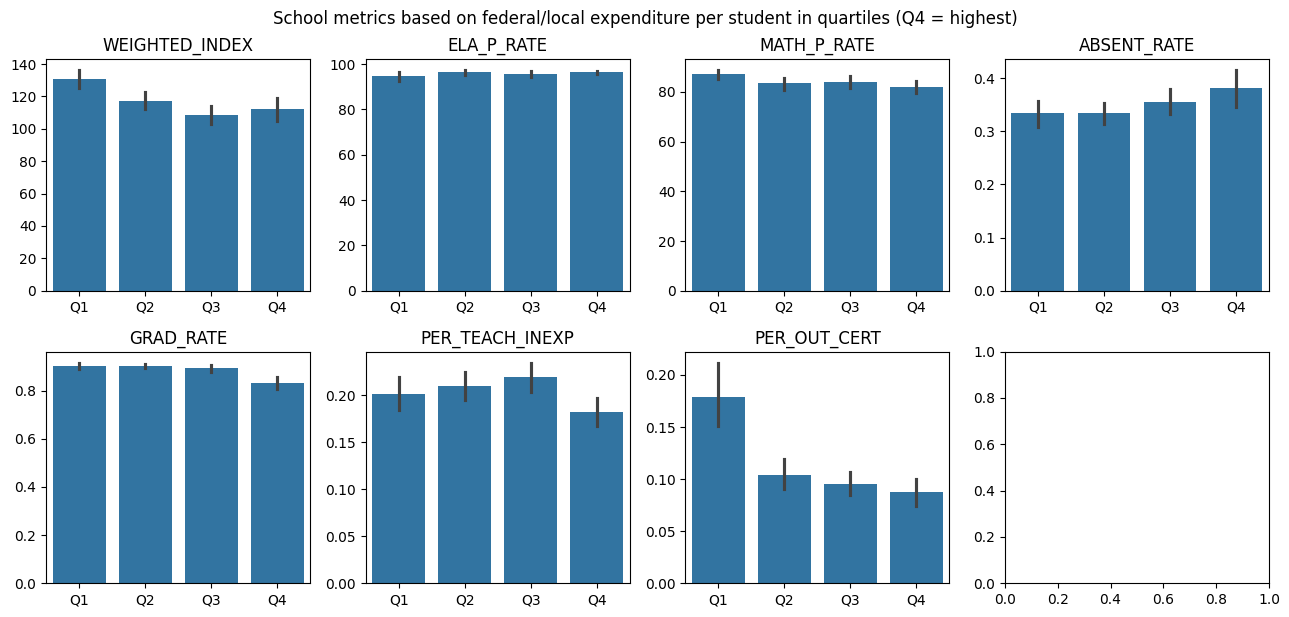

In [55]:
fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = (13, 6))

counter = 0
for var in ['WEIGHTED_INDEX', 'ELA_P_RATE', 'MATH_P_RATE', 'ABSENT_RATE', 'GRAD_RATE', 'PER_TEACH_INEXP', 'PER_OUT_CERT']:
    ax_obj = ax[counter // 4][counter % 4]
    sns.barplot(data = nysed_2024_exp_cat, x = 'EXP_QUARTILE', y = var, ax = ax_obj)
    ax_obj.set_title(var)
    ax_obj.set_xticks(ticks = [0, 1, 2, 3], labels = ['Q1', 'Q2', 'Q3', 'Q4'])

    ax_obj.set_xlabel("")
    ax_obj.set_ylabel("")

    counter += 1

fig.tight_layout() # make sure that the graph titles and axes don't overlap with each other
fig.suptitle('School metrics based on federal/local expenditure per student in quartiles (Q4 = highest)', y = 1.02)